In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as plticker
from matplotlib.colors import LinearSegmentedColormap
from types import SimpleNamespace
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))
import config

figure_path = Path('..') / 'figures'

sns.set(style='ticks', context='poster')
palette = LinearSegmentedColormap.from_list('c', [config.colors['ER'],
                                                  '#527da2',
                                                  config.colors['1C'],
                                                  '#44aa51'
                                                  ], N=4)
plt.rcParams["font.family"] = "Avenir"
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['ytick.minor.width'] = 1.5

<ipython-input-22-95be5f0c8a6b>:97: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(figure_path / f'SAS_{shape}_characterization.pdf')
<ipython-input-22-95be5f0c8a6b>:97: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig(figure_path / f'SAS_{shape}_characterization.pdf')
/home/rgutzen/anaconda3/envs/v4a-waves/lib/python3.9/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


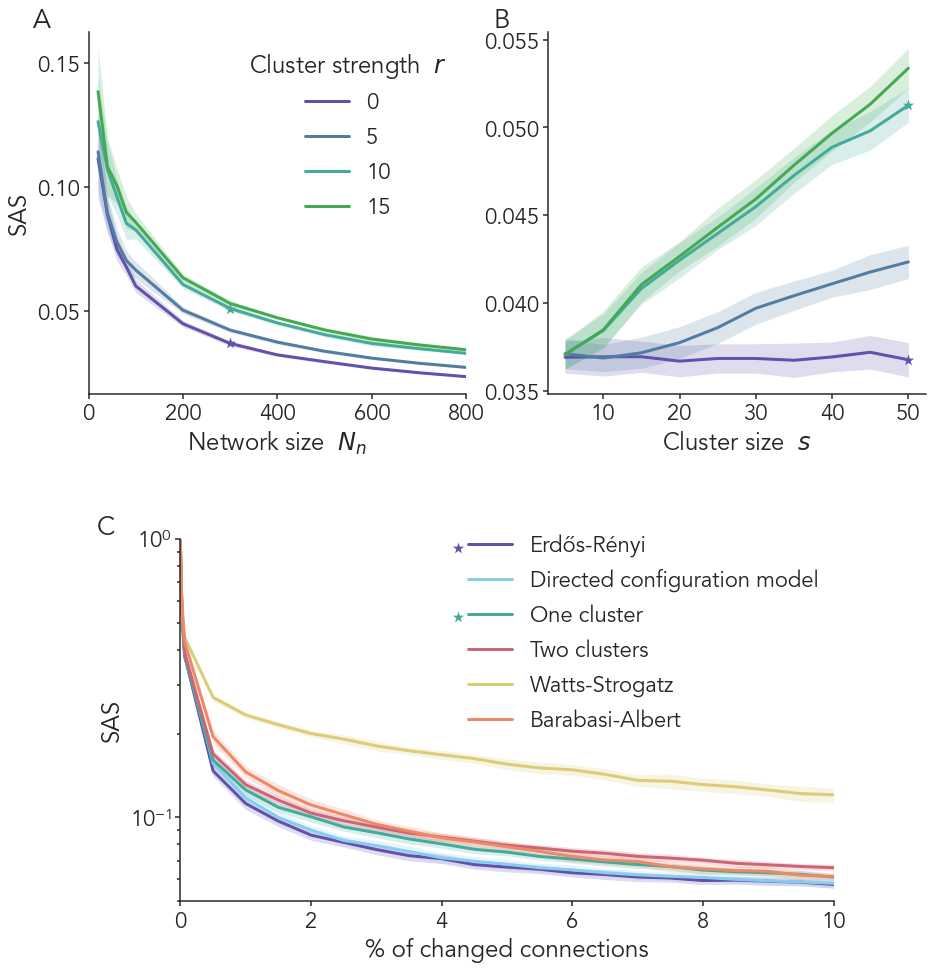

In [22]:
shape = 'square' 
shape = 'rectangular'

mosaic = """
         AAAAABBBBB
         .CCCCCCCC.
         """
fig = plt.figure(figsize=(15, 16), layout="constrained")
ax = fig.subplot_mosaic(mosaic, gridspec_kw=dict(hspace=.4, wspace=8))
ax = SimpleNamespace(**ax)

# PANEL A: Scan Network Size
df = pd.read_csv(Path(f'../scores/scan_{shape}_network_size.csv'))
plot_df = df[df.cluster_size.isin([config.default_cluster_size]) \
           & df.cluster_mean.isin(config.cluster_mean) \
           & df.N.isin(config.N)]
plot_df.cluster_mean = plot_df.cluster_mean.astype(int)

sns.lineplot(data=plot_df, x="N", y="score", hue='cluster_mean', 
             estimator=np.mean, errorbar=('sd'), palette=palette, 
             ax=ax.A)
# ax.A.set(aspect='equal')

OC_score = df[(df.N == config.default_N) & (df.cluster_mean == config.default_cluster_mean)].score.mean()
ER_score = df[(df.N == config.default_N) & (df.cluster_mean == 0)] .score.mean()
ax.A.scatter([config.default_N],[OC_score], marker='*', color=config.colors['1C'])
ax.A.scatter([config.default_N],[ER_score], marker='*', color=config.colors['ER'])

ax.A.set_ylabel(r'SAS')
ax.A.set_xlabel(r'Network size  $N_n$')
# ax.A.set_xticks(plot_df.N.unique())
loc = plticker.MultipleLocator(base=0.05)
ax.A.yaxis.set_major_locator(loc)
ax.A.set_xlim((0,max(config.N)))
ax.A.legend(title=r"Cluster strength  $r$", frameon=False, loc='upper right')
sns.despine(ax=ax.A)


# PANEL B: Scan Cluster Size
df = pd.read_csv(Path(f'../scores/scan_{shape}_cluster_size.csv'))
plot_df = df[df.cluster_size.isin(config.cluster_size) \
           & df.cluster_mean.isin(config.cluster_mean) \
           & df.N.isin([config.default_N])]
plot_df.cluster_mean = plot_df.cluster_mean.astype(int)

sns.lineplot(data=plot_df, x="cluster_size", y="score", hue="cluster_mean", 
             estimator=np.mean, errorbar=('sd'), palette=palette, ax=ax.B)

OC_score = df[(df.cluster_size == 50) & (df.cluster_mean == config.default_cluster_mean)].score.mean()
ER_score = df[(df.cluster_size == 50) & (df.cluster_mean == 0)] .score.mean()
ax.B.scatter([50],[OC_score], marker='*', color=config.colors['1C'])
ax.B.scatter([50],[ER_score], marker='*', color=config.colors['ER'])

ax.B.set_ylabel('')
ax.B.set_xlabel(r"Cluster size  $s$")
# ax.B.set_xticks(plot_df.cluster_size.unique())
loc = plticker.MultipleLocator(base=0.005)
ax.B.yaxis.set_major_locator(loc)
# ax.B.legend(title="Cluster Strength", frameon=False, loc='upper center')
ax.B.get_legend().remove()
sns.despine(ax=ax.B)


# PANEL C: Scan Model Perturbation
N = config.default_N
M = config.default_M if shape == 'rectangular' else N
df = pd.read_csv(Path(f'../scores/scan_model_perturbation_{N}x{M}.csv'))
df['percentage_change'] = df.apply(lambda row: row.num_changes / (row.N*row.M)*100, axis=1)
df['model_title'] = df.apply(lambda row: config.titles[row.model], axis=1)

sns.lineplot(data=df, x="percentage_change", y="score", hue='model', 
             estimator=np.mean, errorbar=('sd'), palette=config.colors, ax=ax.C)

ax.C.set_ylabel(r'SAS')
ax.C.set_xlabel('% of changed connections')
ax.C.set_xlim((0,10))
ax.C.set_ylim((0.05,1))
# ax.A.set_xticks(plot_df.percentage_change.unique())
ax.C.set_yscale('log')
sns.despine(ax=ax.C)

h, l = ax.C.get_legend_handles_labels()
ax.C.legend(handles=h, labels=[config.titles[label] for label in l],
            frameon=False, loc='lower left', bbox_to_anchor=(0.41, .41, 0.5, 0.5))
ax.C.scatter([4.25],[0.925], marker='*', color=config.colors['ER'])
ax.C.scatter([4.25],[0.525], marker='*', color=config.colors['1C'])

# PANEL LETTERS
dx, dy = .1, .03
text_params = dict(ha='right', va='center', fontsize=26, weight='bold')
ax.A.text(s='A', x=-dx, y=1+dy, transform=ax.A.transAxes, **text_params)
ax.B.text(s='B', x=-dx, y=1+dy, transform=ax.B.transAxes, **text_params)
ax.C.text(s='C', x=-dx, y=1+dy, transform=ax.C.transAxes, **text_params)

fig.align_labels()

plt.savefig(figure_path / f'SAS_{shape}_characterization.pdf')